In [0]:
# Recall function
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, GRU, SimpleRNN, Dense, GlobalMaxPool1D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from datetime import date
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
# MAPE Metric Function
def MAPE(y_predict,y_target):
    return ((np.abs(y_predict-y_target)/(y_target)).sum())/n_predict

In [0]:
# R Metric Function
def R(y_predict):
    x_forecast = np.array(GM.drop(['Prediction'],1))[-n_predict:].reshape(-1,1)
    y_predict = np.array(y_predict).reshape(-1,1)
    mean_x_forecast = np.mean(x_forecast)
    mean_y_predict = np.mean(y_predict)
    mean_x_forecast = np.array(mean_x_forecast).reshape(-1,1)
    mean_y_predict = np.array(mean_y_predict).reshape(-1,1)
    nominator = sum((x_forecast-mean_x_forecast)*(y_predict-mean_y_predict))
    denominator = np.multiply(np.sqrt(sum(np.power(x_forecast-mean_x_forecast,2))),np.sqrt(sum(np.power(y_predict-mean_y_predict,2))))   
    return(nominator/denominator)

In [5]:
from google.colab import files
uploaded = files.upload()

Saving GM_data.csv to GM_data.csv


In [0]:
# Data Preprocessing
GM = pd.read_csv('GM_data.csv',error_bad_lines=False)

In [7]:
GM.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,28.54,28.73,28.50,28.57,6316645,GM
1,2013-02-11,28.51,28.65,28.35,28.53,5589830,GM
2,2013-02-12,28.43,28.75,28.24,28.55,7175443,GM
3,2013-02-13,28.75,28.87,28.44,28.67,9281737,GM
4,2013-02-14,28.74,29.36,27.67,27.75,19226730,GM


In [8]:
GM.tail()

,date,open,high,low,close,volume,Name
1254,2018-02-01,42.12,42.60,41.95,42.43,9629833,GM
1255,2018-02-02,42.22,42.27,40.85,41.00,13982144,GM
1256,2018-02-05,40.98,41.67,39.51,39.54,19660620,GM
1257,2018-02-06,40.06,42.23,40.00,41.86,26988259,GM
1258,2018-02-07,41.80,43.56,41.65,42.39,19402866,GM


Text(0.5, 1.0, 'GM Stock')

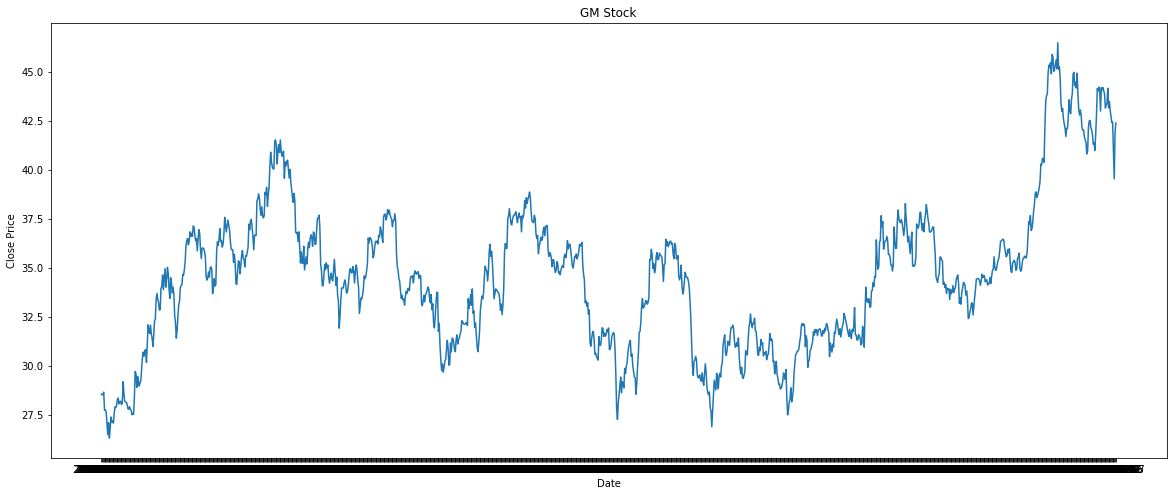

In [9]:
plt.figure(figsize=(20,8))
plt.plot('date','close',data=GM)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('GM Stock')

# **LSTM METHOD**


In [0]:
series = GM['close'].values.reshape(-1,1)

In [0]:
# Normalize the data
scaler = StandardScaler() 
scaler.fit(series[:len(series)//2])
series = scaler.transform(series).flatten()

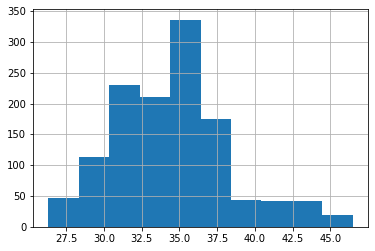

In [12]:
GM['close'].hist()

LSTM setting


In [43]:
# Build the data set
T = 100   # Time sequence window size
D = 1
X = []
Y = []
n_predict = 30

for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y)
N = len(X)

X_train = X[:-n_predict]
Y_train = Y[:-n_predict]
X_test = X[-n_predict:]
Y_test = Y[-n_predict:]

print("X_train.shape",X.shape, "X_test.shape",X_test.shape, "Y_train.shape",Y_train.shape, "Y_test.shape",Y_test.shape)

X_train.shape (1159, 100, 1) X_test.shape (30, 100, 1) Y_train.shape (1129,) Y_test.shape (30,)


In [0]:
# Initialize Hyper-parameters for LSTM
batch_size = 64       # fix
lstm = 50             # PSO search
dropout = 0.2         # PSO search
learning_rate = 0.01  # PSO search

In [45]:
## try autoregressive RNN model (LSTM = 50, Dropout = 0.2, Learning_rate = 0.01, epochs = 50)
i = Input(shape=(T,1))
x = LSTM(lstm)(i)
x = Dropout(dropout)(x)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=learning_rate),
)

#train the RNN
r = model.fit(
    X_train,Y_train,
    batch_size=batch_size,
    epochs=50,
    validation_data=(X_test, Y_test),
)

Epoch 1/50
18/18 [==============================] - 1s 51ms/step - loss: 0.1130 - val_loss: 0.2828
Epoch 2/50
18/18 [==============================] - 1s 35ms/step - loss: 0.0629 - val_loss: 0.1301
Epoch 3/50
18/18 [==============================] - 1s 34ms/step - loss: 0.0560 - val_loss: 0.1018
Epoch 4/50
18/18 [==============================] - 1s 35ms/step - loss: 0.0506 - val_loss: 0.0930
Epoch 5/50
18/18 [==============================] - 1s 35ms/step - loss: 0.0485 - val_loss: 0.2531
Epoch 6/50
18/18 [==============================] - 1s 35ms/step - loss: 0.0493 - val_loss: 0.1069
Epoch 7/50
18/18 [==============================] - 1s 35ms/step - loss: 0.0496 - val_loss: 0.1654
Epoch 8/50
18/18 [==============================] - 1s 35ms/step - loss: 0.0455 - val_loss: 0.2055
Epoch 9/50
18/18 [==============================] - 1s 36ms/step - loss: 0.0539 - val_loss: 0.0790
Epoch 10/50
18/18 [==============================] - 1s 36ms/step - loss: 0.0457 - val_loss: 0.1020
Epoch 11/

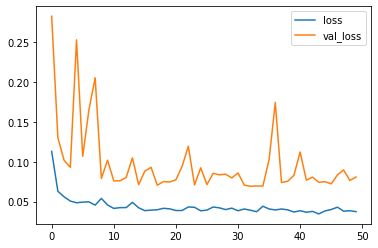

In [46]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

(30, 1)


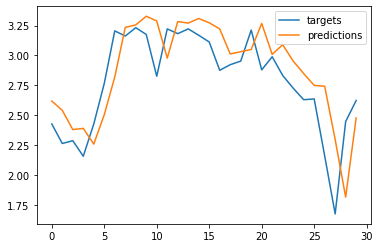

In [47]:
# One-step forecast using true targets
outputs = model.predict(X_test)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y_test, label='targets')
plt.plot(predictions, label='predictions')
plt.legend()
plt.show()

In [48]:
MAPE(predictions,Y_test)

0.09080862071163925

In [49]:
R(predictions)

array([0.7707103])

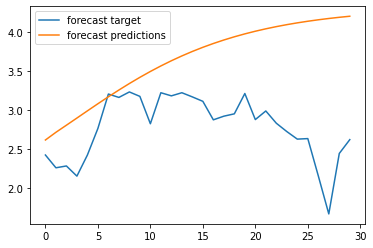

In [50]:
# Multi-step forecast
validation_target = Y_test
validation_predictions = []

# last train input
last_x = X[-n_predict]

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1,T,1))[0,0]
  validation_predictions.append(p)
  last_x = np.roll(last_x,-1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label="forecast predictions")
plt.legend()

In [51]:
MAPE(validation_predictions,Y[-n_predict:])

0.3392967496203299

In [52]:
R(validation_predictions)

array([0.08755319])

In [0]:
# Output -> validation loss
def LSTM_fit(lstm,dropout,learning_rate):
  ## try autoregressive RNN model
    i = Input(shape=(T,1))
    x = LSTM(lstm)(i)
    x = Dropout(dropout)(x)
    x = Dense(1)(x)
    model = Model(i, x)
    model.compile(
        loss='mse',
        optimizer=Adam(lr=learning_rate),
    )

    #train the RNN
    r = model.fit(
        X[:-n_predict],Y[:-n_predict],
        epochs=50,
        validation_data=(X[-n_predict:], Y[-n_predict:]),
        verbose=0,
    )

    return min(r.history['val_loss'])


In [0]:
# output -> multi-forecast prediction
def LSTM_multi_forecast_function(lstm,dropout,learning_rate):
  ## try autoregressive RNN model
    i = Input(shape=(T,1))
    x = LSTM(lstm)(i)
    x = Dropout(dropout)(x)
    x = Dense(1)(x)
    model = Model(i, x)
    model.compile(
        loss='mse',
        optimizer=Adam(lr=learning_rate),
    )

    #train the RNN
    r = model.fit(
        X_train,Y_train,
        epochs=50,
        validation_data=(X_test, Y_test),
        verbose=0,
    )

    # Multi-step forecast
    validation_target = Y_test
    validation_predictions = []

    # last train input
    last_x = X[-n_predict]

    while len(validation_predictions) < len(validation_target):
      p = model.predict(last_x.reshape(1,T,1))[0,0]
      validation_predictions.append(p)
      last_x = np.roll(last_x,-1)
      last_x[-1] = p

    plt.plot(validation_target, label='forecast target')
    plt.plot(validation_predictions, label="forecast predictions")
    plt.legend()

    return validation_predictions


In [0]:
# output -> one-step-forecast prediction
def LSTM_one_forecast_function(lstm,dropout,learning_rate):
  ## try autoregressive RNN model
    i = Input(shape=(T,1))
    x = LSTM(lstm)(i)
    x = Dropout(dropout)(x)
    x = Dense(1)(x)
    model = Model(i, x)
    model.compile(
        loss='mse',
        optimizer=Adam(lr=learning_rate),
    )

    #train the RNN
    r = model.fit(
        X_train,Y_train,
        epochs=50,
        validation_data=(X_test, Y_test),
        verbose=0,
    )

    # One-step forecast using true targets
    outputs = model.predict(X_test)
    print(outputs.shape)
    predictions = outputs[:,0]

    plt.plot(Y_test, label='targets')
    plt.plot(predictions, label='predictions')
    plt.legend()
    plt.show()

    return predictions


Particle Swarm Optimization setting

In [0]:
# Parameters for Particle Swarm Optimization
W = 0.1
c1 = 2
c2 = 2
n_iterations = 3
target_error = 0.03
n_particles = 15  #typical range

In [0]:
class Particle():
    def __init__(self):
        self.position = np.array([int(1**(bool(random.getrandbits(1))) * random.random()*100), 1**(bool(random.getrandbits(1))) * random.random()*0.2, 1**(bool(random.getrandbits(1))) * random.random()*0.1])
        self.pbest_position = self.position
        self.pbest_value = float('inf')
        self.velocity = np.array([0,0,0])

    def __str__(self):
        print("A particle is at ", self.position, " meu pbest is ", self.pbest_position)
    
    def move(self):
        self.position[0] = int(self.position[0]) + int(self.velocity[0])
        self.position[1] = self.position[1] + self.velocity[1]
        self.position[2] = self.position[2] + self.velocity[2]
        if((self.position < 0).any()):
            self.position = abs(self.position)

In [0]:
class Space():
    def __init__(self, target_error, n_particles):
        self.target_error = target_error
        self.n_particles = n_particles
        self.particles = []
        self.gbest_value = float('inf')
        self.gbest_position = np.array([random.random()*50, random.random()*50, random.random()*50])

    def print_particles(self):
        for particle in self.particles:
            particle.__str__()
   
    def fitness(self, particle):
        return LSTM_fit(int(particle.position[0]), particle.position[1], particle.position[2]) 

    def set_pbest(self):
        for particle in self.particles:
            fitness_cadidate = self.fitness(particle)
            if(particle.pbest_value > fitness_cadidate):
                particle.pbest_value = fitness_cadidate
                particle.pbest_position = particle.position
            

    def set_gbest(self):
        for particle in self.particles:
            best_fitness_cadidate = self.fitness(particle)
            if(self.gbest_value > best_fitness_cadidate):
                self.gbest_value = best_fitness_cadidate
                self.gbest_position = particle.position

    def move_particles(self):
        for particle in self.particles:
            global W
            new_velocity = (W*particle.velocity) + (c1*random.random()) * (particle.pbest_position - particle.position) + (random.random()*c2) * (self.gbest_position - particle.position)
            particle.velocity = new_velocity
            particle.move()

In [59]:
# Run the PSO to find hyper-parmateres (LSTM = ?, Dropout = ?, Learning_rate = ?)
search_space = Space(target_error, n_particles)
particles_vector = [Particle() for _ in range(search_space.n_particles)]
search_space.particles = particles_vector
search_space.print_particles()

iteration = 0
while(iteration < n_iterations):
    search_space.set_pbest()    
    search_space.set_gbest()
    print(abs(search_space.gbest_value))
    if(abs(search_space.gbest_value) <= search_space.target_error):
        break

    search_space.move_particles()
    iteration += 1
    
print("The best solution is: ", search_space.gbest_position, " in n_iterations: ", iteration)

A particle is at  [8.70000000e+01 2.57478927e-02 7.87353396e-02]  meu pbest is  [8.70000000e+01 2.57478927e-02 7.87353396e-02]
A particle is at  [8.50000000e+01 1.32648636e-01 7.63970431e-02]  meu pbest is  [8.50000000e+01 1.32648636e-01 7.63970431e-02]
A particle is at  [9.80000000e+01 1.78360357e-01 4.01562419e-02]  meu pbest is  [9.80000000e+01 1.78360357e-01 4.01562419e-02]
A particle is at  [39.          0.07431436  0.07077364]  meu pbest is  [39.          0.07431436  0.07077364]
A particle is at  [8.20000000e+01 1.50453922e-01 2.76170169e-03]  meu pbest is  [8.20000000e+01 1.50453922e-01 2.76170169e-03]
A particle is at  [1.50000000e+01 2.40975183e-03 7.54203176e-02]  meu pbest is  [1.50000000e+01 2.40975183e-03 7.54203176e-02]
A particle is at  [19.          0.04790297  0.03052084]  meu pbest is  [19.          0.04790297  0.03052084]
A particle is at  [4.60000000e+01 7.88460585e-02 2.76614410e-02]  meu pbest is  [4.60000000e+01 7.88460585e-02 2.76614410e-02]
A particle is at  [9

KeyboardInterrupt: ignored

In [1]:
# result is (42, 3.43309769e-04, 9.81054455e-02)

In [61]:
LSTM_fit(42, 3.43309769e-04, 9.81054455e-02)

0.0690256655216217

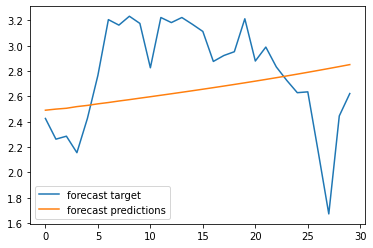

In [67]:
LSTM_Multi_Prediction = LSTM_multi_forecast_function(42, 3.43309769e-04, 9.81054455e-02)

In [68]:
MAPE(LSTM_Multi_Prediction,Y_test)

0.13914591487775615

In [69]:
R(LSTM_Multi_Prediction)

array([-0.15429497])

(30, 1)


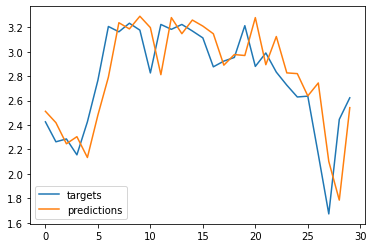

In [70]:
LSTM_One_Prediction = LSTM_one_forecast_function(42, 3.43309769e-04, 9.81054455e-02)

In [71]:
MAPE(LSTM_One_Prediction,Y_test)

0.07966311351022734

In [72]:
R(LSTM_One_Prediction)

array([0.78008715])

## SVR METHOD

In [0]:
GM = GM[['close']]
n_train = len(GM['close']) - 30
n_predict = 30
GM['Prediction'] = GM[['close']].shift(-n_predict)

In [0]:
X = np.array(GM.drop(['Prediction'],1))
y = np.array(GM['Prediction'])
#split data
X = X[:-n_predict]
y = y[:-n_predict]

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [0]:
y_target = y[-n_predict:]

In [0]:
#Parameters setting for SVR
C=1e3
gamma=0.1
epsilon=0.1

In [0]:
def svr(C,gamma,epsilon):
    svr_rbf = SVR(kernel='rbf', C=C, gamma=gamma,epsilon=epsilon) 
    svr_rbf.fit(X_train, y_train)
    svm_confidence = svr_rbf.score(X_test, y_test)
    #print("SVR confidence: ", svm_confidence)
    x_forecast = np.array(GM.drop(['Prediction'],1))[-n_predict:]
    y_predict = svr_rbf.predict(x_forecast)
    #MAPE
    return ((np.abs(y_predict-y_target)/(y_target)).sum())/n_predict

In [0]:
def predicted_svr(C,gamma,epsilon):
    svr_rbf = SVR(kernel='rbf', C=C, gamma=gamma,epsilon=epsilon) 
    svr_rbf.fit(X_train, y_train)
    svm_confidence = svr_rbf.score(X_test, y_test)
    x_forecast = np.array(GM.drop(['Prediction'],1))[-n_predict:]
    y_predict = svr_rbf.predict(x_forecast)
    return(y_predict)

In [34]:
svr(C,gamma,epsilon)

0.03751218593635817

In [0]:
# Parameter for PSO
W = 0.1
c1 = 2
c2 = 2

n_iterations = 100
target_error = 0.01
n_particles = 10

In [0]:
class Particle():
    def __init__(self):
        self.position = np.array([1**(bool(random.getrandbits(1))) * random.random()*1000, 1**(bool(random.getrandbits(1))) * random.random()*0.2, 1**(bool(random.getrandbits(1))) * random.random()*0.2])
        self.pbest_position = self.position
        self.pbest_value = float('inf')
        self.velocity = np.array([0,0,0])

    def __str__(self):
        print("I am at ", self.position, " meu pbest is ", self.pbest_position)
    
    def move(self):
        self.position = self.position + self.velocity
        if((self.position < 0).any()):
            self.position = abs(self.position)

In [0]:
class Space():

    def __init__(self, target_error, n_particles):
        self.target_error = target_error
        self.n_particles = n_particles
        self.particles = []
        self.gbest_value = float('inf')
        self.gbest_position = np.array([random.random()*50, random.random()*50, random.random()*50])

    def print_particles(self):
        for particle in self.particles:
            particle.__str__()
   
    def fitness(self, particle):
        return svr(particle.position[0], particle.position[1], particle.position[2]) 

    def set_pbest(self):
        for particle in self.particles:
            fitness_cadidate = self.fitness(particle)
            if(particle.pbest_value > fitness_cadidate):
                particle.pbest_value = fitness_cadidate
                particle.pbest_position = particle.position
            

    def set_gbest(self):
        for particle in self.particles:
            best_fitness_cadidate = self.fitness(particle)
            if(self.gbest_value > best_fitness_cadidate):
                self.gbest_value = best_fitness_cadidate
                self.gbest_position = particle.position

    def move_particles(self):
        for particle in self.particles:
            global W
            new_velocity = (W*particle.velocity) + (c1*random.random()) * (particle.pbest_position - particle.position) + \
                            (random.random()*c2) * (self.gbest_position - particle.position)
            particle.velocity = new_velocity
            particle.move()
            


In [38]:
search_space = Space(target_error, n_particles)
particles_vector = [Particle() for _ in range(search_space.n_particles)]
search_space.particles = particles_vector
search_space.print_particles()

#print(search_space.set_gbest())
#print(MAPE(search_space.gbest_value,y_target))

I am at  [7.63244119e+02 1.80296966e-01 1.88754344e-01]  meu pbest is  [7.63244119e+02 1.80296966e-01 1.88754344e-01]
I am at  [2.38539196e+02 4.34575487e-02 5.52359222e-02]  meu pbest is  [2.38539196e+02 4.34575487e-02 5.52359222e-02]
I am at  [7.40358377e+02 9.43804037e-02 6.04039806e-02]  meu pbest is  [7.40358377e+02 9.43804037e-02 6.04039806e-02]
I am at  [3.49243020e+02 1.25229495e-01 1.29756987e-02]  meu pbest is  [3.49243020e+02 1.25229495e-01 1.29756987e-02]
I am at  [8.93404301e+02 5.40379211e-02 1.64145197e-02]  meu pbest is  [8.93404301e+02 5.40379211e-02 1.64145197e-02]
I am at  [2.71848806e+02 1.05629586e-01 1.49974564e-01]  meu pbest is  [2.71848806e+02 1.05629586e-01 1.49974564e-01]
I am at  [8.16693169e+02 6.67517442e-02 1.22415541e-01]  meu pbest is  [8.16693169e+02 6.67517442e-02 1.22415541e-01]
I am at  [4.01322284e+02 1.32788240e-01 7.05136938e-03]  meu pbest is  [4.01322284e+02 1.32788240e-01 7.05136938e-03]
I am at  [7.57268060e+02 1.18491605e-01 6.81523306e-02] 

In [0]:
iteration = 0
while(iteration < n_iterations):
    search_space.set_pbest()    
    search_space.set_gbest()
    print(abs(search_space.gbest_value))
    if(abs(search_space.gbest_value) <= search_space.target_error):
        break

    search_space.move_particles()

    iteration += 1
    
print("The best solution is: ", search_space.gbest_position, " in n_iterations: ", iteration)

In [0]:
SVR_Prediction = predicted_svr(3.35386593e+02,5.98620078e-02,2.10892384e-02)

In [0]:
R(SVR_Prediction)

array([0.98701823])

In [0]:
MAPE(SVR_Prediction,y_target)

0.023059732767587517